In [12]:
!pip install wget


In [32]:
import wget
import tarfile
import numpy as np
import pandas as pd
import os
import scipy.io
from PIL import Image
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab import files

In [14]:
url = "http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz"
file_path = "/content/flowers.tgz"
wget.download(url, file_path)

'/content/flowers (1).tgz'

In [15]:
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall("/content/flowers_data")

In [16]:
folder_contents = os.listdir('/content/flowers_data')

print(folder_contents)
print(os.listdir('/content/flowers_data/jpg'))

['jpg']
['image_04651.jpg', 'image_00464.jpg', 'image_05184.jpg', 'image_08066.jpg', 'image_04623.jpg', 'image_02051.jpg', 'image_00582.jpg', 'image_05745.jpg', 'image_02196.jpg', 'image_07719.jpg', 'image_02998.jpg', 'image_03542.jpg', 'image_07965.jpg', 'image_03172.jpg', 'image_03619.jpg', 'image_03073.jpg', 'image_05623.jpg', 'image_02197.jpg', 'image_05084.jpg', 'image_04004.jpg', 'image_07829.jpg', 'image_04608.jpg', 'image_03245.jpg', 'image_06862.jpg', 'image_00737.jpg', 'image_00008.jpg', 'image_06480.jpg', 'image_01337.jpg', 'image_00172.jpg', 'image_01739.jpg', 'image_02126.jpg', 'image_02383.jpg', 'image_07333.jpg', 'image_00327.jpg', 'image_07378.jpg', 'image_03966.jpg', 'image_05685.jpg', 'image_06031.jpg', 'image_04628.jpg', 'image_00866.jpg', 'image_04985.jpg', 'image_05511.jpg', 'image_01462.jpg', 'image_07069.jpg', 'image_02860.jpg', 'image_05397.jpg', 'image_01405.jpg', 'image_07692.jpg', 'image_03325.jpg', 'image_04041.jpg', 'image_00211.jpg', 'image_06094.jpg', 'im

In [17]:
image_directory = '/content/flowers_data/jpg'


image_filenames = [f for f in os.listdir(image_directory) if f.endswith(".jpg")]

num_images = len(image_filenames)

print(f"Number of images in the directory: {num_images}")

print("First 5 filenames:")
print(image_filenames[:5])

Number of images in the directory: 8189
First 5 filenames:
['image_04651.jpg', 'image_00464.jpg', 'image_05184.jpg', 'image_08066.jpg', 'image_04623.jpg']


In [45]:
min_height, min_width = float('inf'), float('inf')
folder_path = "/content/path/to/your/temporary/folder"
file_names = os.listdir(folder_path)

for file_name in file_names:
    image_path = os.path.join(folder_path, file_name)
    image = Image.open(image_path)
    height, width = image.size
    min_height = min(min_height, height)
    min_width = min(min_width, width)

temp_folder = "path/to/your/temporary/folder"
os.makedirs(temp_folder, exist_ok=True)


In [46]:
n_clusters = 102  # Number of clusters (flowers)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [47]:
plt.figure(figsize=(64,64))

for i, file_name in enumerate(file_names):
    image_path = os.path.join(folder_path, file_name)

    image = Image.open(image_path)
    resized_image = image.resize((min_width, min_height))
    resized_image_path = os.path.join(temp_folder, file_name)
    resized_image.save(resized_image_path)

    resized_image_array = np.array(resized_image).reshape((-1, 3))

<Figure size 6400x6400 with 0 Axes>

In [48]:
kmeans.fit(resized_image_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=102, random_state=42)

In [49]:
    labels = kmeans.labels_

In [50]:
    segmented_image = labels.reshape((min_height, min_width))

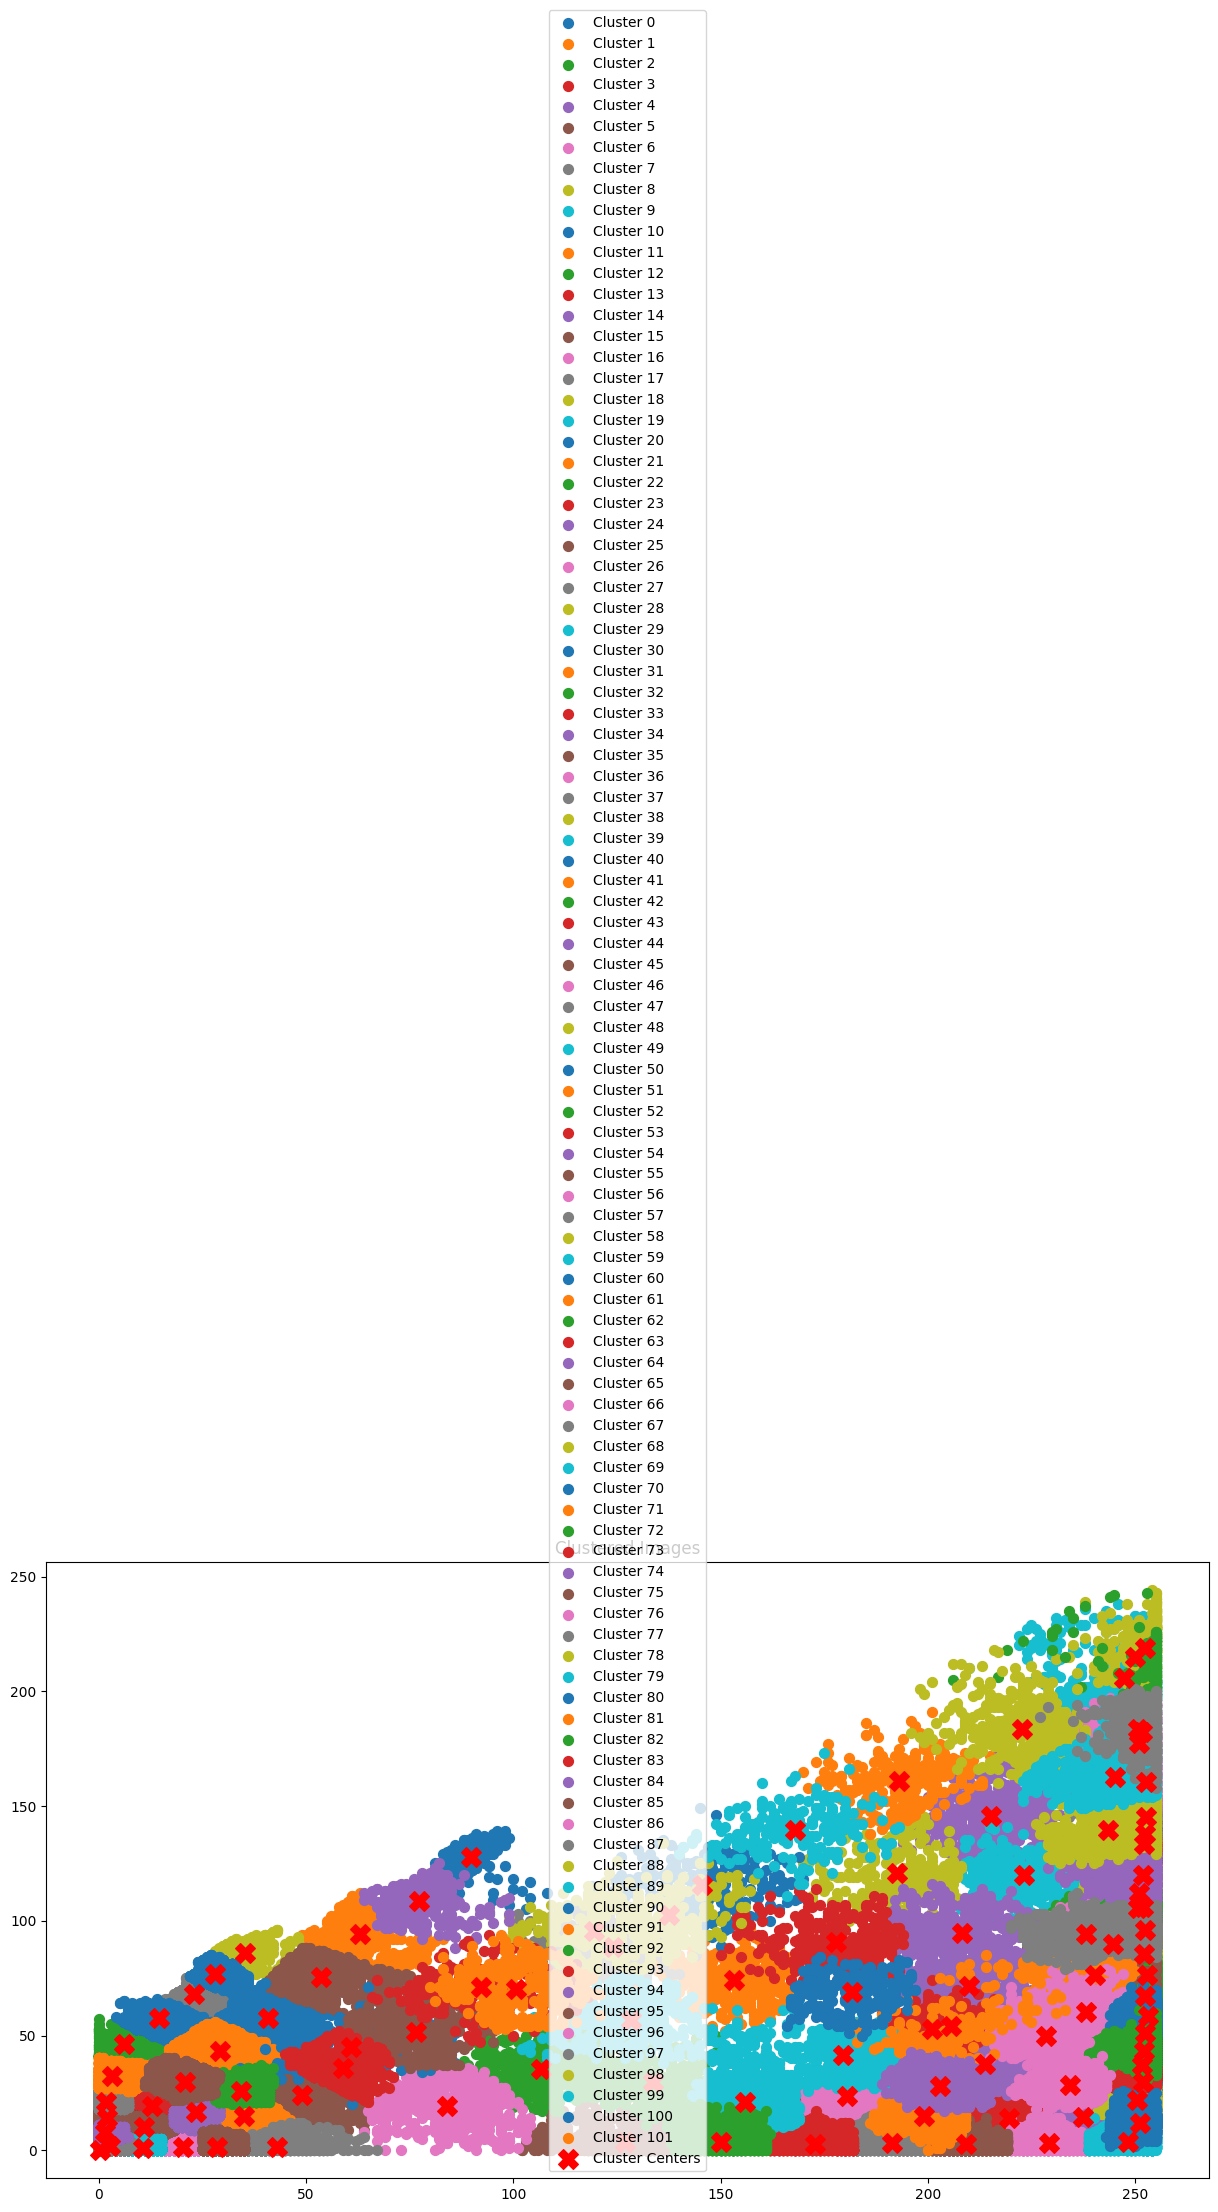

In [51]:
# Visualize the clustered images in a single plot
fig, ax = plt.subplots(figsize=(15, 8))

for i in range(n_clusters):
    # Filter the data points for each cluster
    cluster_points = resized_image_array[kmeans.labels_ == i]

    # Plot the points for each cluster with a specific color
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, label=f'Cluster {i}')

# Plot the cluster centers with a different marker
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Cluster Centers')

ax.set_title('Clustered Images')
ax.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 contains 1 images.
Cluster 1 contains 1 images.
Cluster 2 contains 1 images.
Cluster 3 contains 1 images.
Cluster 4 contains 1 images.
Cluster 5 contains 9 images.
Cluster 6 contains 467 images.
Cluster 7 contains 1 images.
Cluster 8 contains 549 images.
Cluster 9 contains 81 images.
Cluster 10 contains 555 images.
Cluster 11 contains 2 images.
Cluster 12 contains 419 images.
Cluster 13 contains 15 images.
Cluster 14 contains 1 images.
Cluster 15 contains 1 images.
Cluster 16 contains 432 images.
Cluster 17 contains 2 images.
Cluster 18 contains 2 images.
Cluster 19 contains 617 images.
Cluster 20 contains 209 images.
Cluster 21 contains 1 images.
Cluster 22 contains 1 images.
Cluster 23 contains 1 images.
Cluster 24 contains 816 images.
Cluster 25 contains 370 images.
Cluster 26 contains 3 images.
Cluster 27 contains 315 images.
Cluster 28 contains 1 images.
Cluster 29 contains 1 images.
Cluster 30 contains 128 images.
Cluster 31 contains 1 images.
Cluster 32 contains 201 im

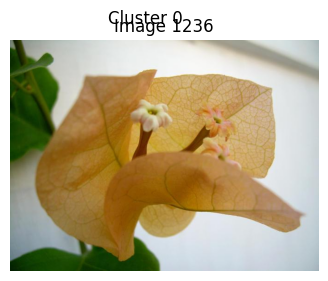

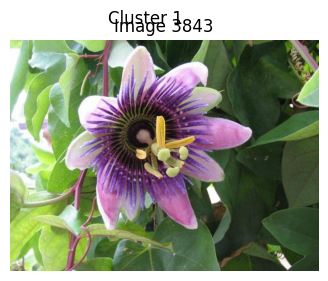

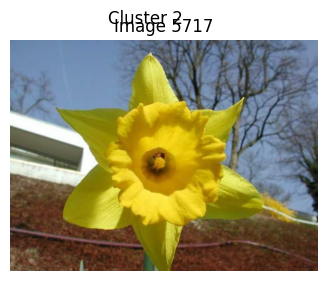

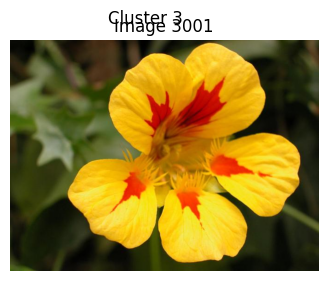

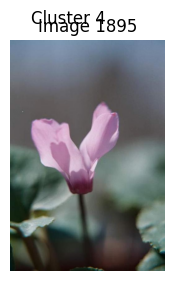

Total number of images: 8189


In [52]:
image_directory = '/content/flowers_data/jpg'

image_data = []

resize_width, resize_height = 64, 64

for filename in os.listdir(image_directory):
    if filename.endswith(".jpg"):
        image_path = os.path.join(image_directory, filename)
        img = cv2.imread(image_path)
        img = cv2.resize(img, (resize_width, resize_height))
        flattened_image = img.flatten()
        image_data.append(flattened_image)

X_train = np.array(image_data)

num_clusters = 102
batch_size = 50

MiniBatchKMeansModel = MiniBatchKMeans(n_clusters=num_clusters, batch_size=batch_size, init='k-means++')

MiniBatchKMeansModel.fit(X_train)

image_labels = MiniBatchKMeansModel.labels_

cluster_sizes = [0] * num_clusters

for label in image_labels:
    cluster_sizes[label] += 1

for cluster in range(num_clusters):
    print(f"Cluster {cluster} contains {cluster_sizes[cluster]} images.")

for cluster_label in range(5):

    cluster_images_indices = [i for i, label in enumerate(image_labels) if label == cluster_label]

    num_images_to_display = min(len(cluster_images_indices), 5)
    plt.figure(figsize=(15, 3))
    for i in range(num_images_to_display):
        img_index = cluster_images_indices[i]
        img_path = os.path.join(image_directory, os.listdir(image_directory)[img_index])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images_to_display, i + 1)
        plt.imshow(img)
        plt.title(f"Image {img_index}")
        plt.axis('off')
    plt.suptitle(f'Cluster {cluster_label}')
    plt.show()

total_images = sum(cluster_sizes)
print(f"Total number of images: {total_images}")


<ipython-input-63-b5a0affccb7d>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_data = np.array(image_data)


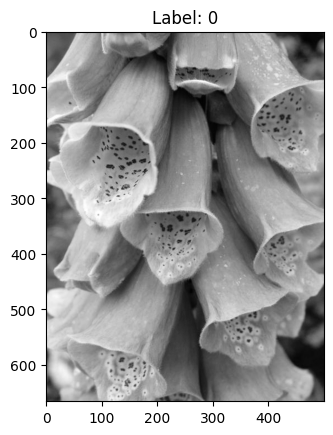

In [63]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Set the path to your image folder
image_folder_path = '/content/flowers_data/jpg'

# Load images from the folder
image_data = []
labels = []

for filename in os.listdir(image_folder_path):
    if filename.endswith(".jpg"):
        image_path = os.path.join(image_folder_path, filename)
        img = cv2.imread(image_path)
        # Assuming you have grayscale images, you may need to adjust accordingly
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        image_data.append(img)
        # Extract a label from the filename or use a predefined label
        labels.append(1 if 'positive' in filename else 0)

# Convert lists to numpy arrays
X_data = np.array(image_data)
y_labels = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.2, random_state=42)

# Plot an example image from the training set
plt.imshow(X_train[0], cmap='gray')  # Adjust cmap based on your image data
plt.title(f"Label: {y_train[0]}")
plt.show()


Epoch 1/10
3/3 [==============================] - 1s 100ms/step - loss: 0.7254 - accuracy: 0.5250 - val_loss: 0.7084 - val_accuracy: 0.6000
Epoch 2/10
3/3 [==============================] - 0s 34ms/step - loss: 0.7060 - accuracy: 0.5250 - val_loss: 0.7115 - val_accuracy: 0.6000
Epoch 3/10
3/3 [==============================] - 0s 21ms/step - loss: 0.6923 - accuracy: 0.5250 - val_loss: 0.7167 - val_accuracy: 0.5500
Epoch 4/10
3/3 [==============================] - 0s 40ms/step - loss: 0.6787 - accuracy: 0.5375 - val_loss: 0.7216 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 0s 34ms/step - loss: 0.6686 - accuracy: 0.5750 - val_loss: 0.7271 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 0s 20ms/step - loss: 0.6572 - accuracy: 0.6000 - val_loss: 0.7312 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 0s 28ms/step - loss: 0.6476 - accuracy: 0.6375 - val_loss: 0.7379 - val_accuracy: 0.5000
Epoch 8/10
3/3 [==========

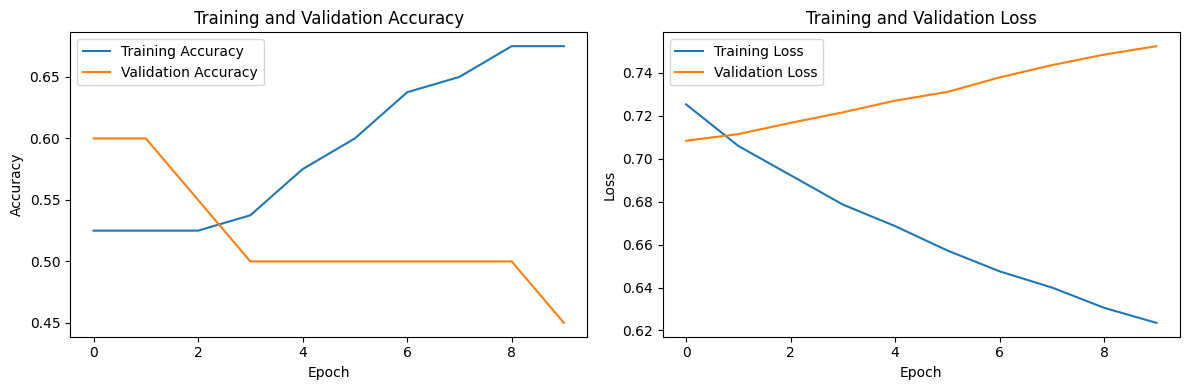

In [92]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Reshape the images to a flat vector (assuming your images are of the same size)
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Define the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(X_train_flat.shape[1],)),  # Flatten the input
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics='accuracy')

# Train the model
history = model.fit(X_train_flat, y_train, epochs=10, validation_data=(X_test_flat, y_test))

# Plot the training history
plt.figure(figsize=(12, 4))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
